In [1]:
using LinearAlgebra, SparseArrays
import gmsh
gmsh.initialize()

include("FEM3D.jl")
using .FEM

In [2]:
# Adatok
E = 2e5
ν = 0.3
height = 100
base = 100
depth = 100
elemSize = 10

approxOrder = 1
internalNodes = true
quadElements = false

problem = FEM.Problem("cube2")

Main.FEM.Problem("cube2", "Solid", 200000.0, 0.3, 7.85e-9, 1.0)

In [3]:
#gmsh.model.occ.synchronize()

In [4]:
gmsh.open("cube2.geo")

Info    : Reading 'cube2.geo'...
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 30%] Meshing curve 4 (Line)
Info    : [ 40%] Meshing curve 5 (Line)
Info    : [ 50%] Meshing curve 6 (Line)
Info    : [ 50%] Meshing curve 7 (Line)
Info    : [ 60%] Meshing curve 8 (Line)
Info    : [ 70%] Meshing curve 9 (Line)
Info    : [ 80%] Meshing curve 10 (Line)
Info    : [ 90%] Meshing curve 11 (Line)
Info    : [100%] Meshing curve 12 (Line)
Info    : Done meshing 1D (Wall 0.00159142s, CPU 0.001593s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : [ 20%] Meshing surface 2 (Plane, Frontal-Delaunay)
Info    : [ 40%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : [ 50%] Meshing surface 4 (Plane, Frontal-Delaunay)
Info    : [ 70%] Meshing surface 5 (Plane, Frontal-Delaunay)
Info    : [ 90%] Meshing surface 6 (Plane, Frontal-Delaunay)
Info    : 

In [5]:
gmsh.fltk.run()

-------------------------------------------------------
Version       : 4.12.1-git-38a28aaaf
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 20240111
Build host    : gmsh.info
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blas[petsc] Blossom Cgns DIntegration Dlopen DomHex Eigen[contrib] Fltk Gmm[contrib] Hxt Jpeg Kbipack Lapack[petsc] LinuxJoystick MathEx[contrib] Med Mesh Metis[contrib] Mmg Mpeg Netgen ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom PETSc Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR Voro++[contrib] WinslowUntangler Zlib
FLTK version  : 1.4.0
PETSc version : 3.14.4 (real arithmtic)
OCC version   : 7.7.2
MED version   : 4.1.0
Packaged by   : geuzaine
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------


In [6]:
# Néhány láthatósági beállítás 0:kikapcs. 1:bekapcs.
gmsh.option.setNumber("Geometry.CurveLabels", 0)
gmsh.option.setNumber("Geometry.Points", 0)
gmsh.option.setNumber("Geometry.Curves", 0)
gmsh.option.setNumber("Mesh.Points", 0)
gmsh.option.setNumber("Mesh.Lines", 0)
gmsh.option.setNumber("Mesh.SurfaceEdges", 0)
gmsh.option.setNumber("Mesh.NodeLabels", 0)
gmsh.option.setNumber("Mesh.LineLabels", 0)
gmsh.option.setNumber("Mesh.SurfaceLabels", 0)

In [7]:
problem

Main.FEM.Problem("cube2", "Solid", 200000.0, 0.3, 7.85e-9, 1.0)

In [8]:
K = FEM.stiffnessMatrixSolid(problem)

8565×8565 SparseMatrixCSC{Float64, Int64} with 1598625 stored entries:
⎡⡿⣯⣭⣽⣧⣤⣤⡿⠡⡤⠄⣿⣤⣤⡄⣿⣤⡤⠤⡤⣤⣤⣤⣤⣤⣤⣤⣤⣤⣭⣭⣅⣼⣤⣤⣼⣭⡿⢿⣿⎤
⎢⣇⣿⣿⣿⣹⣿⣏⣿⣿⣾⠷⣟⣟⣞⣿⣯⣿⣿⣽⣷⣿⣿⣿⣿⣿⣾⣿⣿⣿⣯⣶⣯⣝⣛⣯⣿⣿⣇⣈⣿⎥
⎢⠉⣿⣷⣾⠻⣦⡙⡏⠀⠄⠀⡟⠳⣄⠁⡿⣧⡄⠂⣄⣤⣤⢀⣶⣴⣤⣤⠰⠷⠉⠁⠐⠛⠛⠛⠃⠙⡍⠱⠏⎥
⎢⣤⡿⣯⣽⡷⠬⠿⣧⣤⠤⢥⣧⠤⠼⡦⣷⠦⠿⡽⠭⠥⠼⠿⠥⠭⠥⠭⠿⠬⣿⣭⣷⢦⣶⣶⣮⡷⣧⣤⣾⎥
⎢⠁⡦⣻⣿⠀⠄⠀⡟⠻⣦⣹⡏⠻⣆⣹⡏⢵⣄⢷⣀⡶⣤⣀⡾⣰⣶⣦⣘⢶⡁⠉⠛⠋⠉⠛⠋⠛⡇⠀⠏⎥
⎢⣤⣥⣽⢧⣤⠤⠥⣷⡷⠾⠿⣧⡤⢬⣽⡧⠒⠯⠺⠭⠦⠾⠭⠶⠱⠷⠮⠭⠌⣧⡿⠷⢦⣤⣴⣿⣿⣧⡤⣮⎥
⎢⠀⣿⣻⢽⠙⢦⣀⡇⠻⢦⡀⣏⠻⣦⣻⡆⠂⠀⢀⣤⡶⠶⣠⡟⣸⡴⢶⣜⠳⡀⣀⡀⠙⠉⠋⠁⣋⡆⠈⢃⎥
⎢⣤⣭⡿⣿⣥⡤⢬⣯⡷⠾⠷⡿⠻⠾⡿⣯⡤⢤⣤⠴⠦⠶⠿⢴⠴⠤⠾⢷⡬⣧⣷⣭⣿⣿⢯⣿⣿⣧⡤⣿⎥
⎢⠀⡿⣿⣿⠉⠿⣬⡇⠑⢷⡼⡄⠈⠀⠀⣏⠻⣦⣻⣤⠻⢾⣤⠟⡿⡟⢷⣬⢛⡀⣀⡉⠁⠁⠈⢉⡈⡇⠈⢃⎥
⎢⠀⡧⢷⣿⠈⢤⡗⡏⠙⢳⡞⡆⠀⣴⢀⡟⠛⣾⢻⣶⡆⠶⣶⡟⣾⡖⡆⣚⠉⠛⠒⠉⠁⠀⠉⠙⠉⡇⠀⠓⎥
⎢⠀⣿⣿⣿⠀⣿⣁⡇⠘⣯⣨⡇⢸⡏⢨⡇⣻⣆⢨⡍⢻⣶⣈⢔⣯⢽⣷⡀⢘⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⎥
⎢⠀⣿⣿⣿⢠⣴⠟⡇⣠⡼⢣⡇⣤⠾⢛⣇⣤⠟⣼⠿⢂⢜⠻⣦⣳⢇⡾⢿⣌⠀⠀⠀⠀⠀⡀⡀⣀⠃⢀⡄⎥
⎢⠀⣿⣻⣿⠐⣿⠇⡇⢰⣾⢵⡆⢒⡾⠐⡇⣿⠯⢺⠿⣏⣟⠽⢞⡿⣯⣷⠽⢶⠀⠀⠀⠀⠀⠀⠀⠀⡄⠀⠂⎥
⎢⠀⣿⣿⣿⢀⡛⣧⡇⣈⢻⡎⡇⣘⢷⢾⣇⡙⣷⣨⢩⠙⠻⣾⣏⣝⡟⠻⣦⡸⠆⠀⠀⡀⠀⣀⡀⣀⡇⢀⡀⎥
⎢⡄⣿⡿⣿⡝⠃⣦⣧⠜⠳⠦⣥⠙⠢⠦⣯⠛⠰⣧⠀⠒⠐⠂⠙⠘⠓⠲⠎⠻⣦⣶⡆⠁⠀⠉⠵⣶⣦⡜⣧⎥
⎢⠇⢿⡼⣿⢁⠀⢧⣿⣧⠀⢿⡏⠀⠸⡝⣿⡄⠸⡜⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⠿⠿⣧⡄⣤⣤⢿⡭⠍⠁⠿⎥
⎢⠒⣿⣷⢹⣿⠀⢨⣷⡏⠀⠈⣷⡗⠀⣿⣿⠅⠀⠁⠀⠀⠀⠀⠀⠀⠀⠀⠈⠁⠀⠀⣭⣿⣿⣿⠿⣾⠀⠒⡗⎥
⎢⣀⣿⣯⣿⠿⠀⡸⣿⡿⠀⣴⣿⠏⠀⣯⣷⡆⢀⣇⠀⠀⠀⠀⠨⠀⠀⠀⠸⢇⡄⣤⣟⣿⡟⣿⣿⣿⡆⣀⣧⎥
⎢⣧⡿⠿⢿⡗⠤⠽⣯⠿⠤⠿⣿⠫⠼⠿⣿⠦⠬⠧⠤⠤⠤⠤⠘⠀⠤⠤⠼⠸⣿⡇⠏⠚⠛⠻⠿⠿⣧⡄⣿⎥
⎣⣿⣷⣦⣼⡵⠆⣠⣿⡤⠄⡠⣯⠦⢀⣤⣯⠦⢀⢤⠀⠀⠀⠀⠴⠠⠀⠀⠰⠶⣭⣥⡄⢼⠤⠤⣼⣤⣭⣿⣿⎦

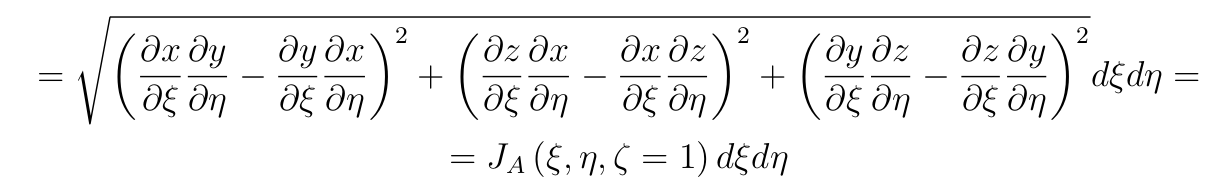

In [9]:
supp = FEM.displacementConstraint("supp", ux=0, uy=0, uz=0)
load = FEM.traction("load", fy=-1)

("load", 0, -1, 0)

In [10]:
K, f = FEM.applyBoundaryConditions!(problem, K, [supp], [load])

(sparse([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  8484, 8485, 8486, 8487, 8488, 8489, 8490, 8563, 8564, 8565], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  8565, 8565, 8565, 8565, 8565, 8565, 8565, 8565, 8565, 8565], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  -338624.33862388635, -43413.37674745366, -43413.37674744288, 8682.675347414526, 477547.14421472774, -43413.376746922404, -338624.3386240524, 2.3514280087510997e-6, 2.3600248511002064e-6, 3.056301722974964e6], 8565, 8565), [0.0; 0.0; … ; 0.0; 0.0;;])

In [11]:
#det(K)

In [12]:
q = FEM.solveDisplacement(K, f)

8565×1 Matrix{Float64}:
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  ⋮
  0.00031955953722380686
 -0.0001987033246346444
 -7.451871836604842e-5
 -0.0003195599102803633
 -0.00019870222872434663
  7.452370675097039e-5
 -0.007451241384969514
 -0.1925380736431441
  2.6564843094083606e-6

In [13]:
S = FEM.solveStressPlaneStress(problem, q)

([[-18.04350708516264, -0.08374368987852653, -0.06032755408748942, -0.08374368987852653, -0.01640577414333233, -0.0027248658739471112, -0.06032755408748942, -0.0027248658739471112, -0.004072643454974045, 0.01342974896505463  …  0.0009801877180463103, -4.307115634684278, -1.3764076492255883, -0.008409571732639887, -1.3764076492255883, 0.002045009108579965, 9.251893528062301e-8, -0.008409571732639887, 9.251893528062301e-8, 0.0009166914448579533], [-0.035857498116834884, -1.7056087086723166, -0.007026432964055517, -1.7056087086723166, -0.004970277015097094, -0.0036494056049206016, -0.007026432964055517, -0.0036494056049206016, -0.007578895875502682, 23.901826356912284  …  0.0010106091274904275, -0.00683286471702198, -1.4138170680529616, 0.0003725651459933216, -1.4138170680529616, -0.002260325781893655, -0.0004923527953175859, 0.0003725651459933216, -0.0004923527953175859, -0.002210798595885414], [24.050557900987055, -0.05655656638495638, -0.07989554454116714, -0.05655656638495638, 0.00782

In [14]:
gmsh.option.setNumber("View.IntervalsType", 3)
gmsh.option.setNumber("View.VectorType", 5)
gmsh.option.setString("View.Format", "%.6g")

In [15]:
u = FEM.showResultUvec(problem, q, name="uvec", visible=false)
ux = FEM.showResultUX(problem, q, name="ux", visible=false)
uy = FEM.showResultUY(problem, q, name="uy", visible=false)
s = FEM.showResultS(problem, S, name="σ", visible=false, smooth=false)
sx = FEM.showResultSX(problem, S, name="σx", visible=true, smooth=true)
sy = FEM.showResultSY(problem, S, name="σy", visible=false, smooth=true)
sxy = FEM.showResultSXY(problem, S, name="τxy", visible=false, smooth=false)

Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)


7

In [16]:
pp1 = gmsh.model.occ.addPoint(50, 0, 5)
pp2 = gmsh.model.occ.addPoint(50, 10, 5)
pp3 = gmsh.model.occ.addPoint(base / 8, height / 4, 0)

pl1 = gmsh.model.occ.addLine(pp1, pp2)
pl2 = gmsh.model.occ.addSpline([pp1, pp3, pp2])


gmsh.model.occ.synchronize()

In [17]:
FEM.plotOnPath(problem, pl1, sx, 100, name="σred", visible=false);

In [18]:
#gmsh.option.setNumber("PostProcessing.Binary", 1)
#gmsh.option.setNumber("PostProcessing.SaveMesh", 1)

#gmsh.write("rect.msh")
#gmsh.write("rect.opt")
#gmsh.view.write(4, "rect.pos")

In [19]:
gmsh.fltk.run()

-------------------------------------------------------
Version       : 4.12.1-git-38a28aaaf
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 20240111
Build host    : gmsh.info
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blas[petsc] Blossom Cgns DIntegration Dlopen DomHex Eigen[contrib] Fltk Gmm[contrib] Hxt Jpeg Kbipack Lapack[petsc] LinuxJoystick MathEx[contrib] Med Mesh Metis[contrib] Mmg Mpeg Netgen ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom PETSc Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR Voro++[contrib] WinslowUntangler Zlib
FLTK version  : 1.4.0
PETSc version : 3.14.4 (real arithmtic)
OCC version   : 7.7.2
MED version   : 4.1.0
Packaged by   : geuzaine
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------


In [20]:
gmsh.finalize()